<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [1]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'TechNovaInnovations'

### Function for loading data - do not change

In [2]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import datetime

def load_data(DATASET):
    dataset_list = ['uwetech-dataset01', 'uwetech-dataset02', 'uwetech-dataset03', 'uwetech-dataset04',
                    'CyberWaveSolutions', 'TechNovaInnovations', 'QuantumByteSystems', 'NexGenCyberTech']
    if DATASET in dataset_list:
        email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
        file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
        web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
        login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
        usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
        employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
        
        email_data['datetime'] = pd.to_datetime(email_data['datetime'])
        file_data['datetime'] = pd.to_datetime(file_data['datetime'])
        web_data['datetime'] = pd.to_datetime(web_data['datetime'])
        login_data['datetime'] = pd.to_datetime(login_data['datetime'])
        usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])
    else:
        print ("DATASET variable not defined - please refer to Blackboard for DATASET name")
        return
    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_21133/1319915571.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_21133/1319915571.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_21133/1319915571.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  web_data = 

### The following code samples may be useful to aid your investigation

In [3]:
# This shows the employee_data DataFrame
employee_data

user       role                             email    pc
0   usr-bcc  Technical  usr-bcc@technova-innovations.net   pc0
1   usr-fxz      Legal  usr-fxz@technova-innovations.net   pc1
2   usr-jit         HR  usr-jit@technova-innovations.net   pc2
3   usr-bsv         HR  usr-bsv@technova-innovations.net   pc3
4   usr-num   Security  usr-num@technova-innovations.net   pc4
..      ...        ...                               ...   ...
95  usr-vzu    Finance  usr-vzu@technova-innovations.net  pc95
96  usr-jmh      Legal  usr-jmh@technova-innovations.net  pc96
97  usr-vko         HR  usr-vko@technova-innovations.net  pc97
98  usr-jde   Director  usr-jde@technova-innovations.net  pc98
99  usr-ynd  Technical  usr-ynd@technova-innovations.net  pc99

[100 rows x 4 columns]

In [4]:
# This shows the login_data DataFrame
login_data

datetime     user  action    pc
0     2018-01-01 00:10:58  usr-daf   login  pc62
1     2018-01-01 00:18:42  usr-eqs   login  pc48
2     2018-01-01 00:24:54  usr-vdy   login  pc31
3     2018-01-01 02:47:12  usr-gyv   login  pc73
4     2018-01-01 02:51:52  usr-lmw   login  pc79
...                   ...      ...     ...   ...
36195 2018-06-30 23:01:02  usr-gxz  logoff  pc66
36196 2018-06-30 23:22:38  usr-tir  logoff  pc90
36197 2018-06-30 23:37:36  usr-vtc  logoff  pc27
36198 2018-06-30 23:47:41  usr-bcc  logoff   pc0
36199 2018-06-30 23:53:48  usr-pqq  logoff  pc17

[36200 rows x 4 columns]

In [5]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-nic']

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [6]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-nic'])]

Empty DataFrame
Columns: [datetime, user, action, pc]
Index: []

In [7]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Technical', 'Legal', 'HR', 'Security', 'Services', 'Director',
       'Finance'], dtype=object)

In [8]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [9]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-gxd',
 'usr-vac',
 'usr-ali',
 'usr-ams',
 'usr-heb',
 'usr-jkp',
 'usr-eff',
 'usr-oci',
 'usr-iqy',
 'usr-vnd',
 'usr-ljx',
 'usr-ypg',
 'usr-idd',
 'usr-vzu']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

/var/folders/h4/6f163_1s6yv6b5rhkqbls4v40000gn/T/ipykernel_21133/1276321369.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_logins['hour'] = january_logins['datetime'].dt.hour   # raising warningerror but better not to use .loc which will make changes directly to DATAFRAME


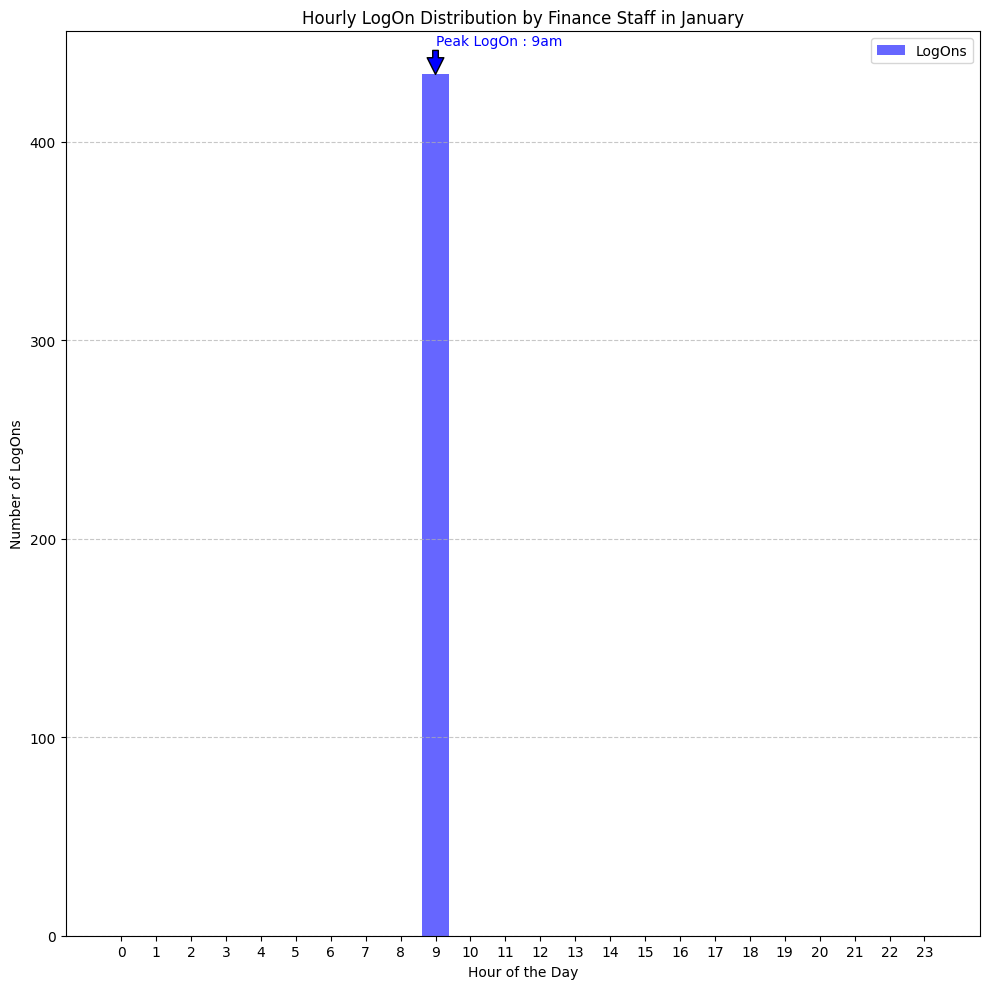

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 

#Load specific datasets 
employee_data = pd.read_csv("/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/employee_data.csv")
login_data = pd.read_csv("/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/login_data.csv")

#Filter the staff role to Finance from employees_data 
finance_staff = employee_data[employee_data['role'] == 'Finance']['user']

#Convert 'datetime' to datetime format 
login_data ['datetime'] = pd.to_datetime(login_data['datetime'])  

#Filter login_data for January (Finance staff ) 
january_logins = login_data[
    (login_data['user'].isin(finance_staff)) &
    (login_data['datetime'].dt.month == 1 ) 
]


#Extract hour and action for login hours in January 
january_logins['hour'] = january_logins['datetime'].dt.hour   # raising warningerror but better not to use .loc which will make changes directly to DATAFRAME


#Separating logon and logoff from action column 
logon_data = january_logins[january_logins['action'] == 'login' ] 
logoff_data = january_logins[january_logins['action'] == 'logoff'] 

#Aggregate counts by hour 
all_hours = pd.RangeIndex(0,24)  # Full range of hours 
logon_counts = logon_data.groupby('hour').size().reindex(all_hours, fill_value = 0 ) 
logoff_counts = logoff_data.groupby('hour').size().reindex(all_hours, fill_value = 0 )



#Bar chart for LogOn events 
plt.figure(figsize= (10,10))
plt.bar(logon_counts.index, logon_counts.values, color = 'blue', alpha = 0.6, label = 'LogOns')
plt.title("Hourly LogOn Distribution by Finance Staff in January")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of LogOns")
plt.xticks(range(0,24))     #ensure all 24 hours are shown 
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) 


#Highlighting peak LogOn Hour
if not logon_counts.empty:
    peak_logon_hour = logon_counts.idxmax()
    plt.annotate(f"Peak LogOn : {peak_logon_hour}am", xy = (peak_logon_hour, logon_counts[peak_logon_hour]), 
xytext  = (peak_logon_hour, logon_counts[peak_logon_hour] + 15 ),
arrowprops = dict(facecolor = 'blue' ), color = 'blue') 

plt.tight_layout()
plt.show()

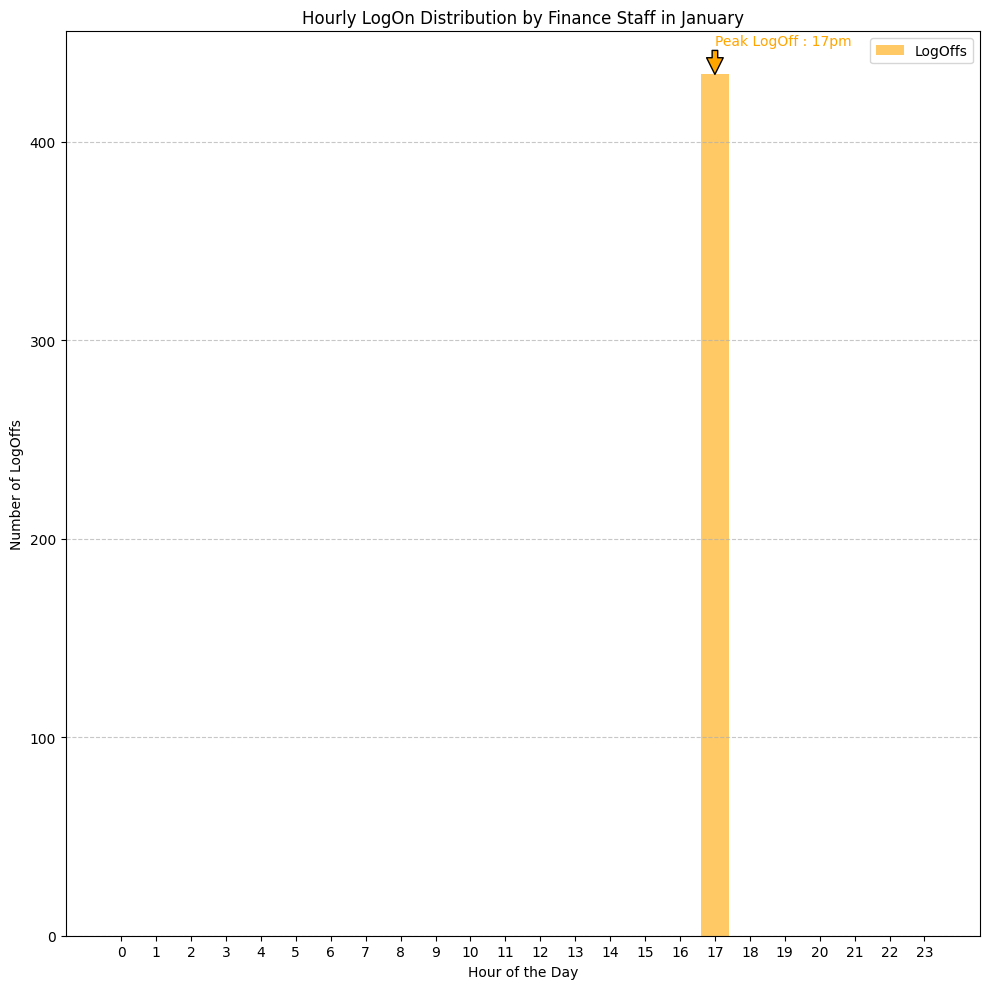

Peak LogOn Hour: 9am 
Peak LogOff Hour: 17pm 


In [11]:
#Bar Chart for LogOff
plt.figure(figsize= (10,10))
#Logoff Distribution 
plt.bar(logoff_counts.index, logoff_counts.values, color = 'orange', alpha = 0.6, label = 'LogOffs')
plt.title("Hourly LogOn Distribution by Finance Staff in January")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of LogOffs")
plt.xticks(range(0,24))          #ensure all 24 hours are shown 
plt.legend()
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) 


#highlighting peak LogOff Hour
if not logoff_counts.empty:
    peak_logoff_hour = logoff_counts.idxmax()
    plt.annotate(f"Peak LogOff : {peak_logoff_hour}pm", xy = (peak_logoff_hour, logoff_counts[peak_logoff_hour]), 
xytext  = (peak_logoff_hour, logoff_counts[peak_logoff_hour] + 15 ),
arrowprops = dict(facecolor = 'orange'), color = 'orange' ) 

plt.tight_layout()
plt.show()


#print peak hours 
print(f"Peak LogOn Hour: {logon_counts.idxmax()}am " )
print(f"Peak LogOff Hour: {logoff_counts.idxmax()}pm ")

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



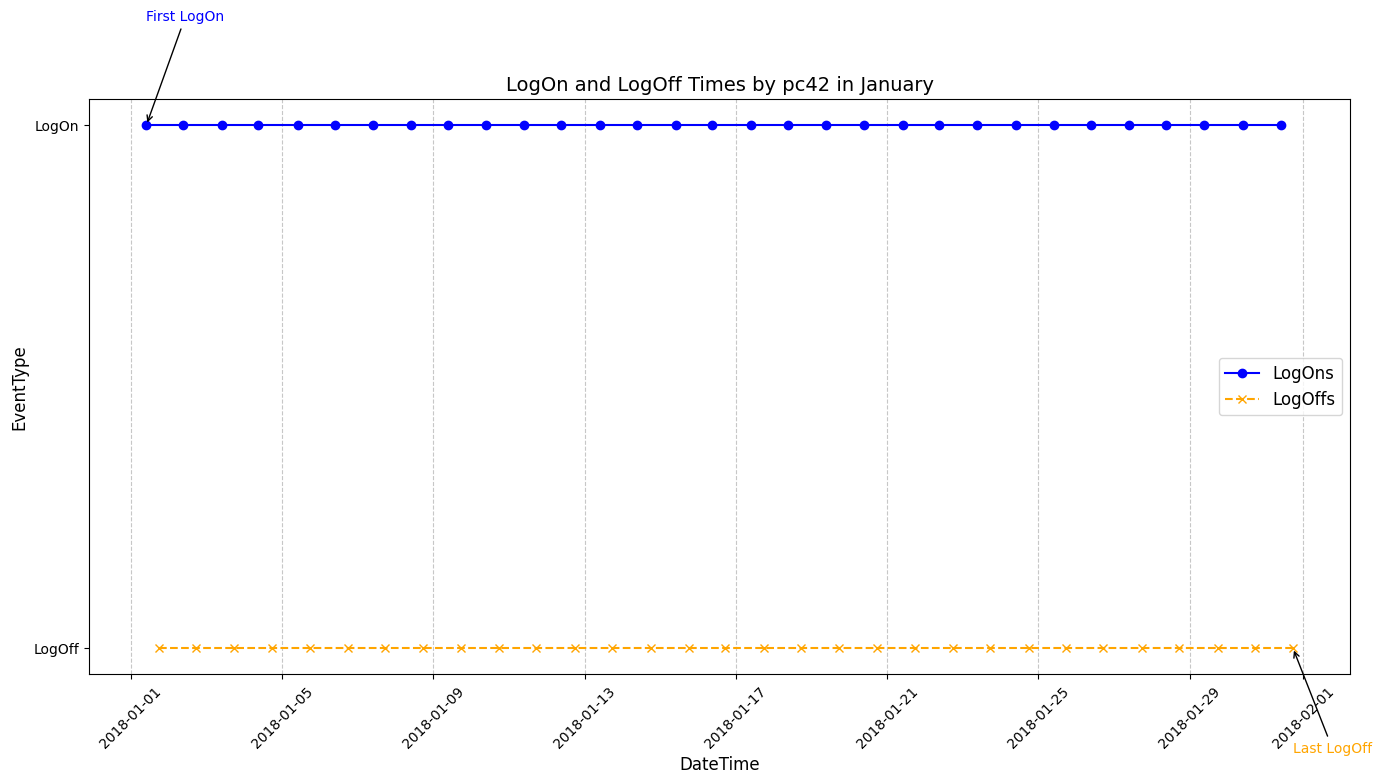

In [12]:
######### ADD YOUR CODE HERE ##########

import pandas as pd 
import matplotlib.pyplot as plt


#convert  'datetime ' to datetime format 
login_data['datetime'] = pd.to_datetime(login_data['datetime'], errors = 'coerce')

#Filter for events in January for pc 42 
jan_logins_pc42 = login_data[
(login_data['pc'] == "pc42") & 
(login_data['datetime'].dt.month == 1 )
]


#separate logon and logoff events 
logon_jan_pc42 = jan_logins_pc42[jan_logins_pc42['action'] == 'login'] 
logoff_jan_pc42 = jan_logins_pc42 [jan_logins_pc42['action'] == 'logoff']


#Multi-line chart 
plt.figure(figsize=(14,8))


#plot logon times 
plt.plot(logon_jan_pc42['datetime'], [1]  * len(logon_jan_pc42), label = "LogOns", marker = 'o', linestyle = '-', color = 'blue') 

#plot logoff times
plt.plot(logoff_jan_pc42['datetime'], [0] * len(logoff_jan_pc42), label = "LogOffs", marker = 'x', linestyle = '--'  , color = 'orange') 


#get firstlogon and lastlogoff ( to identify suspicious , interesting points ) - extended work 
first_logon = logon_jan_pc42.head(1)     
last_logoff = logoff_jan_pc42.tail(1)

#Annotate interesting points (extended work ) 
if not first_logon.empty:
    plt.annotate(
        "First LogOn", 
        xy = (first_logon['datetime'].values[0],1), 
        xytext = (first_logon['datetime'].values[0], 1.2),
        arrowprops = dict(facecolor="blue", arrowstyle = '->'),
        fontsize = 10 , 
        color = 'blue'
)



if not last_logoff.empty:
    plt.annotate(
        "Last LogOff",
        xy= (last_logoff['datetime'].values[0],0),
        xytext = (last_logoff['datetime'].values[0], -0.2),
        arrowprops = dict(facecolor = "orange", arrowstyle = "->"),
        fontsize = 10,
        color = 'orange'
)


#create the chart 
plt.title("LogOn and LogOff Times by pc42 in January", fontsize =14)
plt.xlabel("DateTime", fontsize = 12)
plt.ylabel("EventType", fontsize  = 12) 
plt.yticks([0,1], labels = ['LogOff', 'LogOn'])  
plt.xticks(rotation = 45)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)
plt.legend (fontsize = 12 ) 


#optimize layout 
plt.tight_layout()


#show the plot 
plt.show()

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2018. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

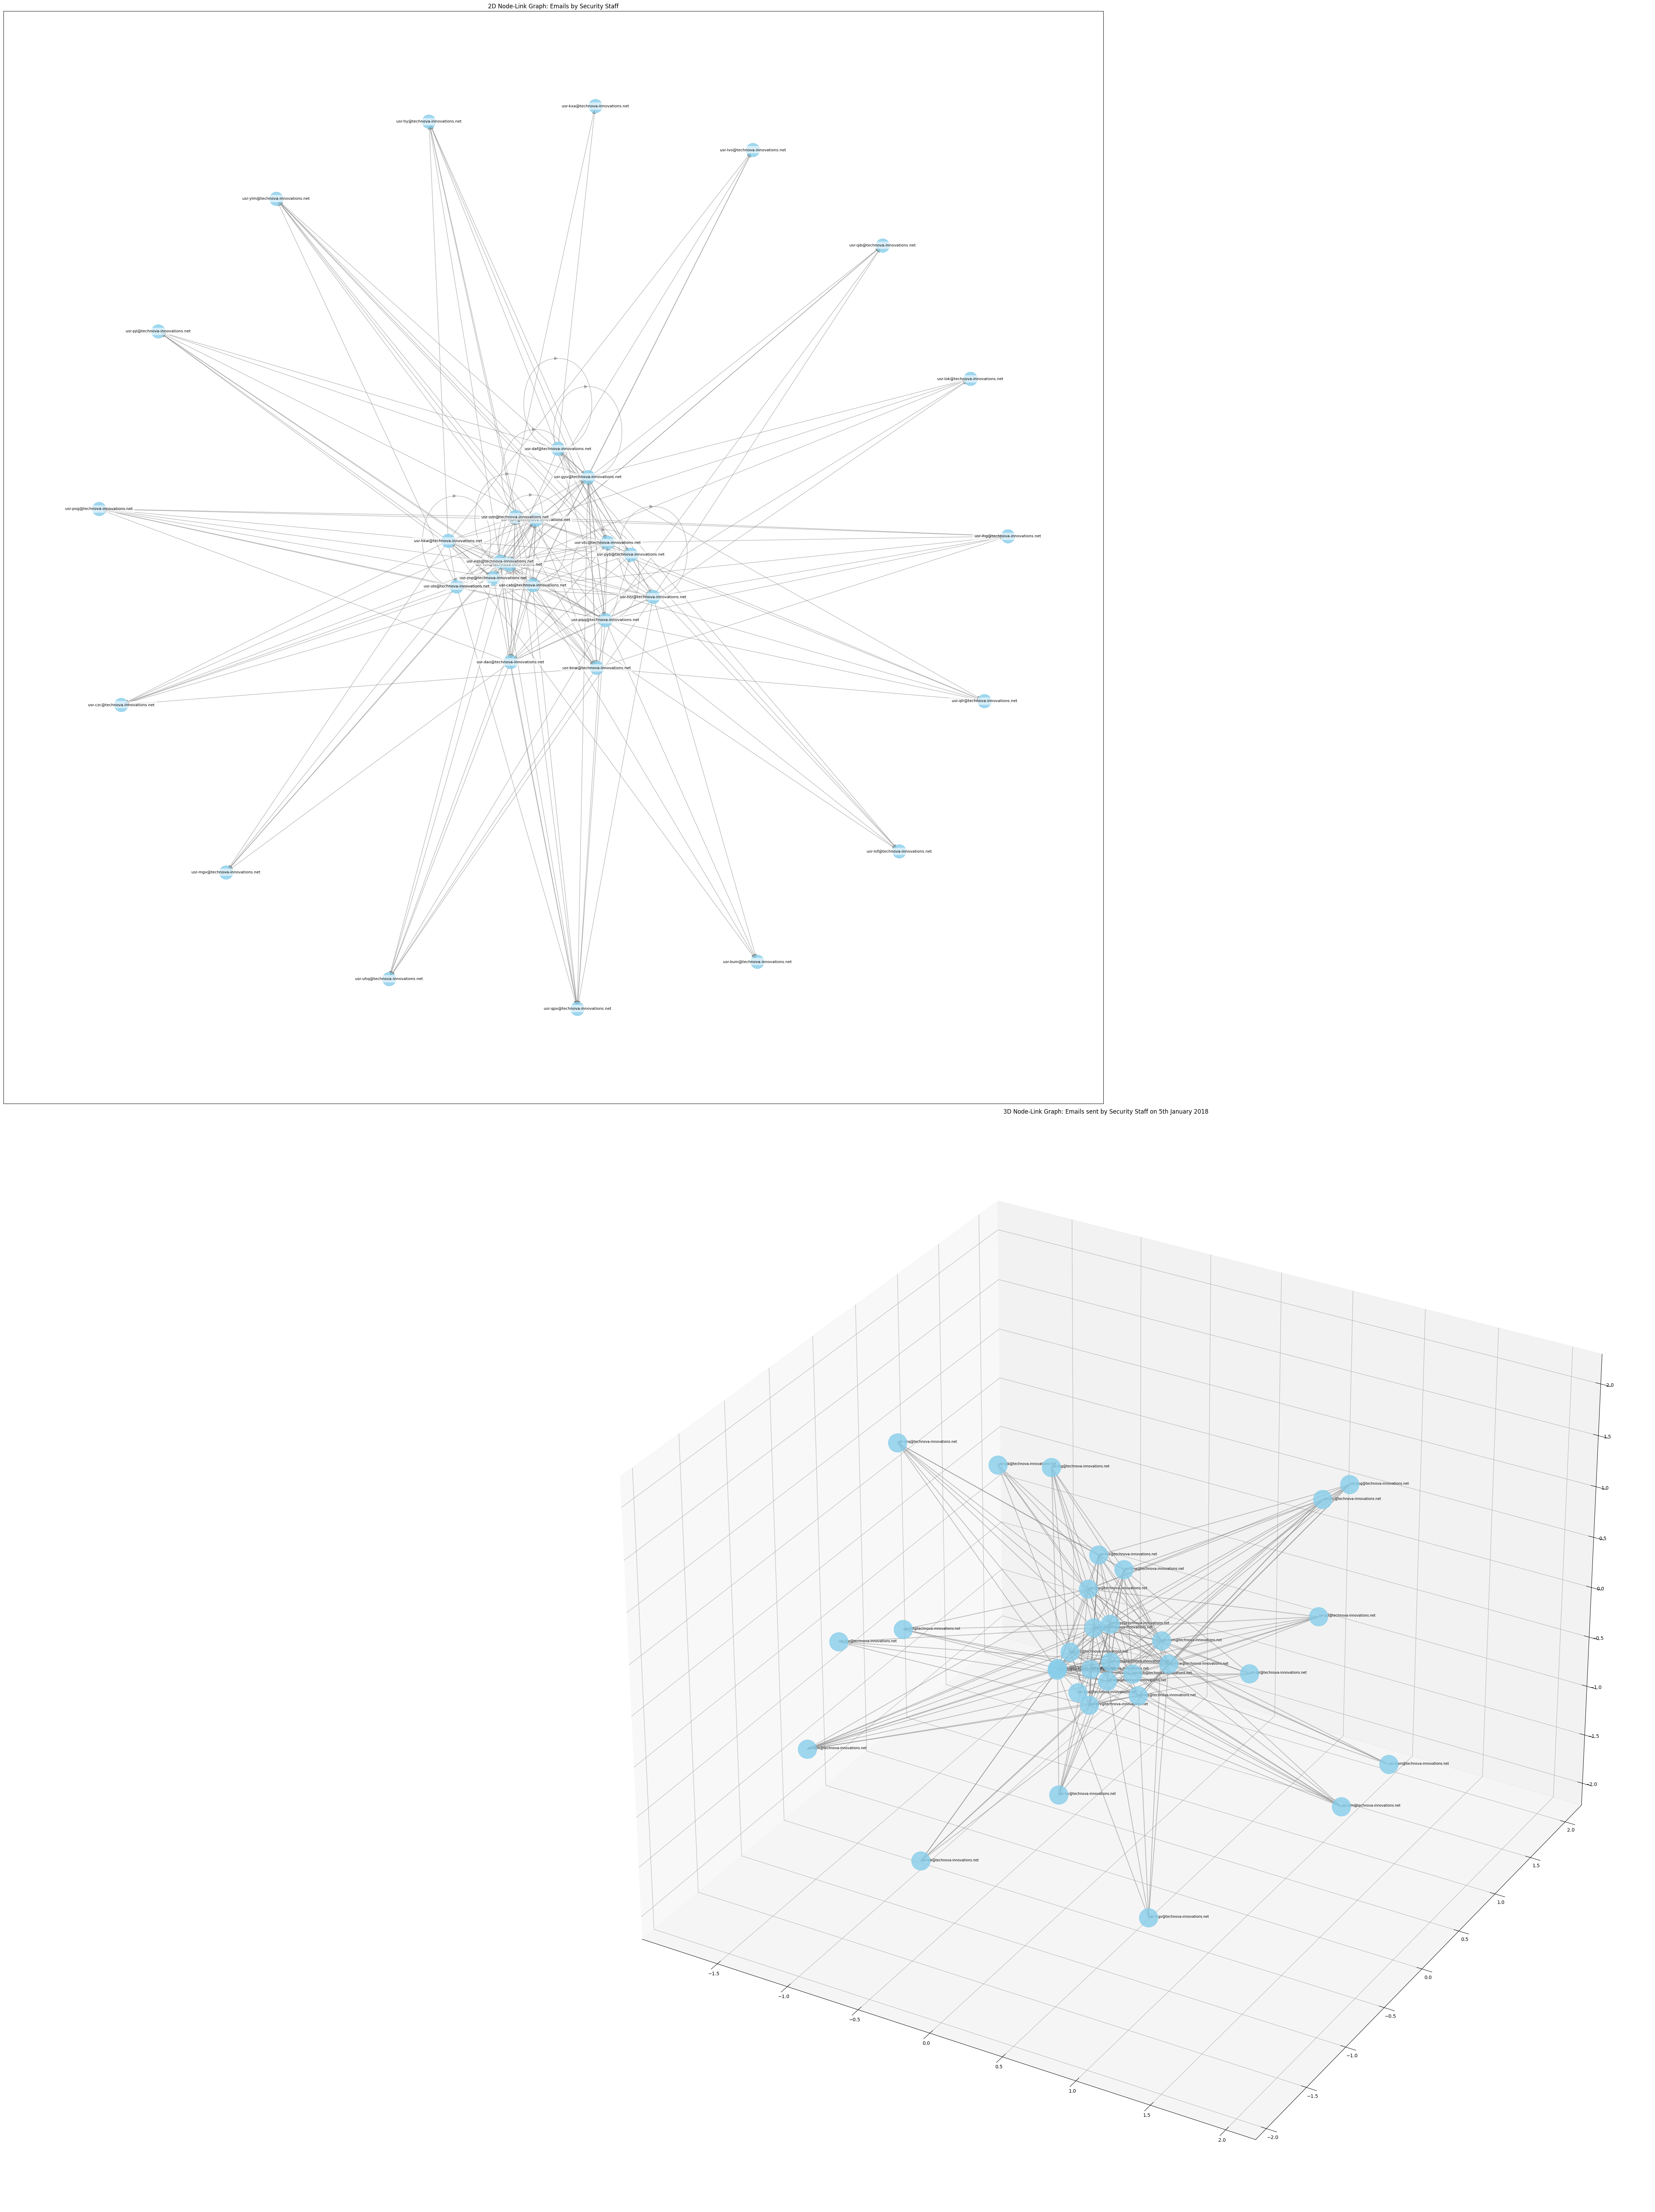

In [13]:
######### ADD YOUR CODE HERE ##########
import pandas as pd
import networkx as nx 
import matplotlib.pyplot as plt

#load datasets 
email_data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/email_data.csv')
employee_data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/employee_data.csv')


#Filter employee_data for security staff
security_staff = employee_data[employee_data['role']=='Security']['email']


#Filter email_data for january 5th 2018 
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors = 'coerce')
jan5_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()]


#Filter emails sent by Security Staff
security_emails = jan5_emails[jan5_emails['sender'].isin(security_staff)]


#build node_link data (the same way as source and destination  in question 4  , part 1 ) 
edges = list(zip(security_emails['sender'], security_emails['recipient']))


#create graph 
G = nx.DiGraph()   #directed graph for emails 
G.add_edges_from(edges)

#create figure with two subplots (2D and 3D visualisation ) 
fig = plt.figure(figsize=(64,64))


#First subplot:2D graph 
ax1 = fig.add_subplot(221)    # 1 row, 2 columns, subplot 1 
pos2d = nx.spring_layout(G, k= 0.5, iterations = 100000, scale =2 )
nx.draw_networkx_nodes(G, pos = pos2d, node_size =800, node_color = "skyblue", alpha = 0.8, ax =ax1)
nx.draw_networkx_edges(G, pos = pos2d, edge_color = "gray", arrowsize = 15, alpha = 0.6, ax =ax1)
nx.draw_networkx_labels(
    G, pos=pos2d, font_size = 8, font_color="black", bbox = dict(facecolor="white", edgecolor = "none", alpha = 0.6), ax=ax1)
ax1.set_title('2D Node-Link Graph: Emails by Security Staff')



#Second subplot :3D
ax2 = fig.add_subplot(212, projection = '3d') 
pos3d  = nx.spring_layout(G,dim = 3,k = 0.5, iterations = 10000, scale = 2)


#Extract 3D node positions 
x_nodes= [pos3d[node][0] for node in G.nodes()]
y_nodes= [pos3d[node][1] for node in G.nodes()]
z_nodes= [pos3d[node][2] for node in G.nodes()]
ax2.scatter(x_nodes, y_nodes, z_nodes, s = 1500, color = 'skyblue', alpha = 0.8) 


#Drawing edges in 3D
for edge in G.edges():
    x_edges = [pos3d[edge[0]][0], pos3d[edge[1]][0]]
    y_edges = [pos3d[edge[0]][1], pos3d[edge[1]][1]]
    z_edges = [pos3d[edge[0]][2], pos3d[edge[1]][2]]
    ax2.plot(x_edges, y_edges, z_edges, color = "gray", alpha = 0.5)



#add node labels in 3D
for node in G.nodes():
    ax2.text(pos3d[node][0], pos3d[node][1], pos3d[node][2], s = str(node), size = 7, zorder = 1, color = "black")
ax2.set_title("3D Node-Link Graph: Emails sent by Security Staff on 5th January 2018")


#adjust layout 
plt.tight_layout()

#show plot 
plt.show()

### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

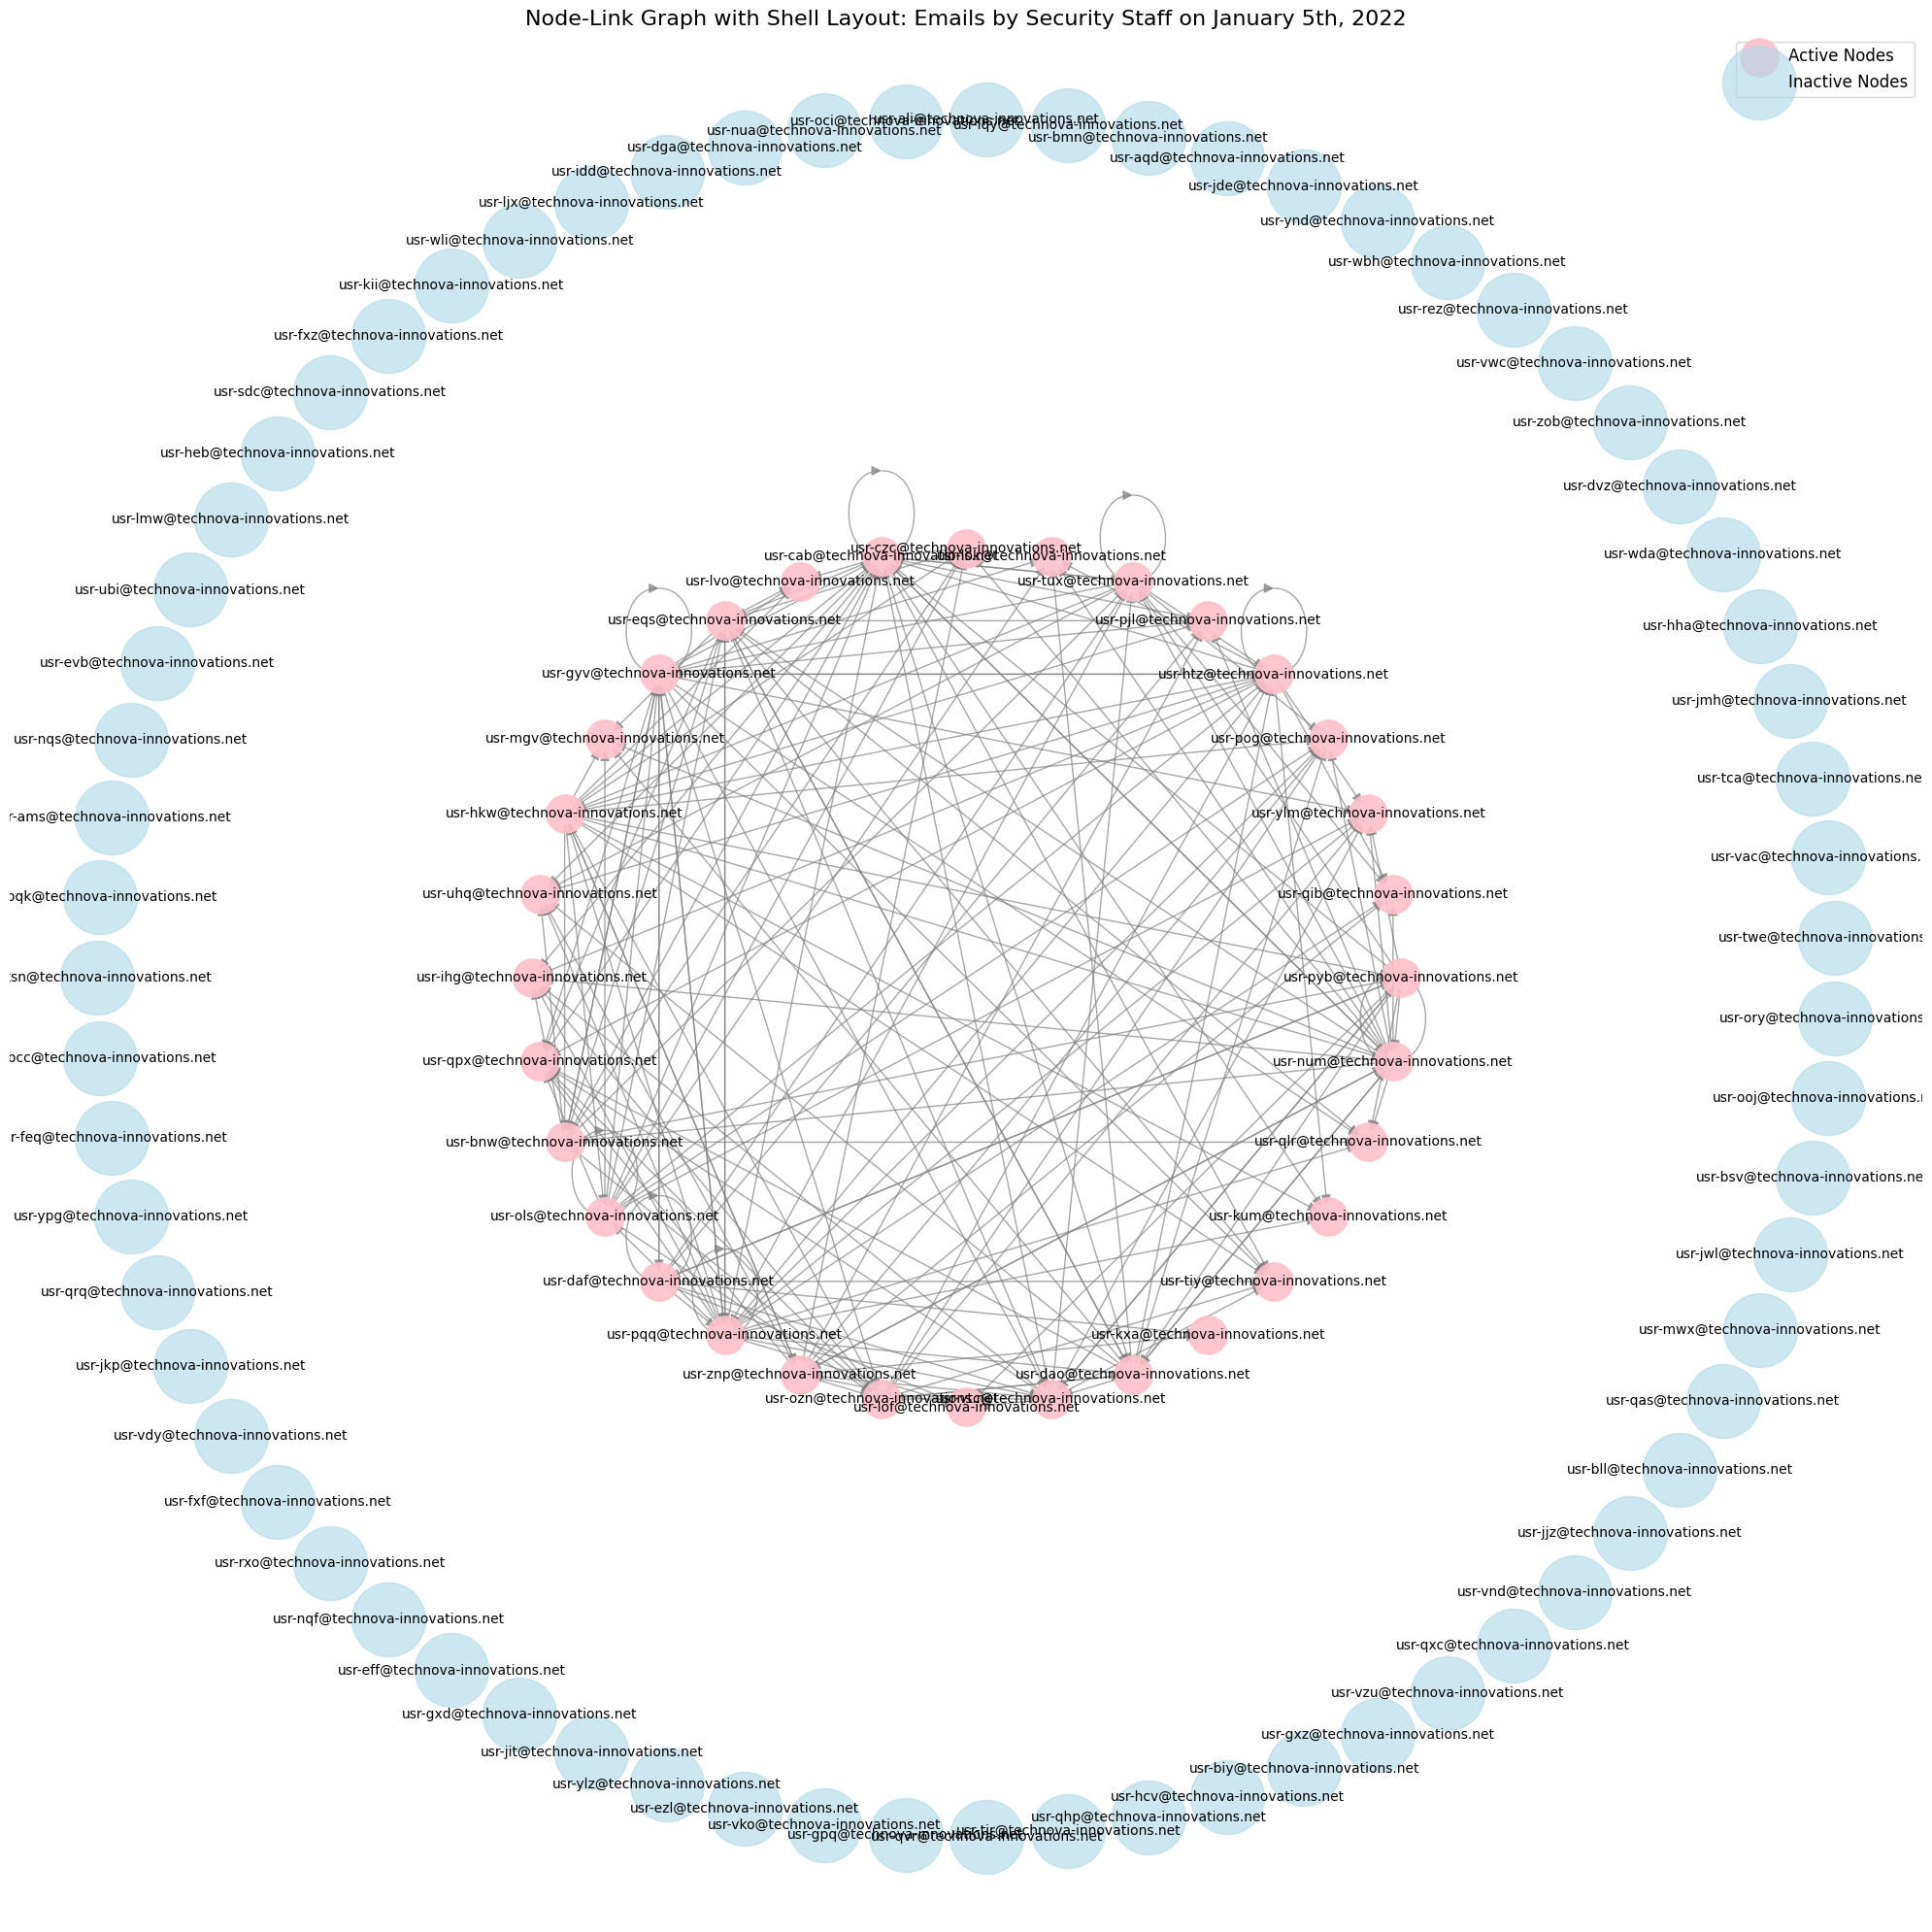

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the datasets
email_data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/email_data.csv')
employee_data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/employee_data.csv')

# Step 2: Extract all possible users from employee_data
all_users = employee_data['email'].unique()

# Step 3: Filter employee_data for Security staff
security_staff = employee_data[employee_data['role'] == 'Security']['email']

# Step 4: Filter email_data for January 5th, 2022
email_data['datetime'] = pd.to_datetime(email_data['datetime'], errors='coerce')
jan_5_emails = email_data[email_data['datetime'].dt.date == pd.Timestamp('2018-01-05').date()]

# Step 5: Filter emails sent by Security staff
security_emails = jan_5_emails[jan_5_emails['sender'].isin(security_staff)]

# Step 6: Build the node-link data (source and destination)
edges = list(zip(security_emails['sender'], security_emails['recipient']))

# Step 7: Include all users as nodes
G = nx.DiGraph()
G.add_nodes_from(all_users)  # Add all possible users as nodes
G.add_edges_from(edges)      # Add edges from Security staff emails

# Step 8: Define active and inactive nodes
active_nodes = set(security_emails['sender']).union(set(security_emails['recipient']))
inactive_nodes = set(all_users) - active_nodes

# Step 9: Define the shell layout with active and inactive nodes
shell_layout = [list(active_nodes), list(inactive_nodes)]  # Inner: active nodes, Outer: inactive nodes
pos = nx.shell_layout(G, nlist=shell_layout)

# Step 10: Plot the graph
plt.figure(figsize=(20, 20))

# Draw active nodes (inner shell)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=list(active_nodes),
    node_size=800, node_color="pink", alpha=0.9, label='Active Nodes'
)

# Draw inactive nodes (outer shell)
nx.draw_networkx_nodes(
    G, pos,
    nodelist=list(inactive_nodes),
    node_size=3000, node_color="lightblue", alpha=0.6, label='Inactive Nodes'
)

# Draw edges
nx.draw_networkx_edges(
    G, pos,
    edge_color='gray', arrows=True, arrowsize=15, alpha=0.7, width=1.0
)

# Draw labels

nx.draw_networkx_labels(
    G, pos,
    font_size=10, font_color="black"
)


# Enhance the plot with a title and legend
plt.title('Node-Link Graph with Shell Layout: Emails by Security Staff on January 5th, 2022', fontsize=16)
plt.legend(loc="upper right", fontsize=12)
plt.axis('off')  # Hide axis for clean visualization
plt.tight_layout()

# Show plot
plt.show()


### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

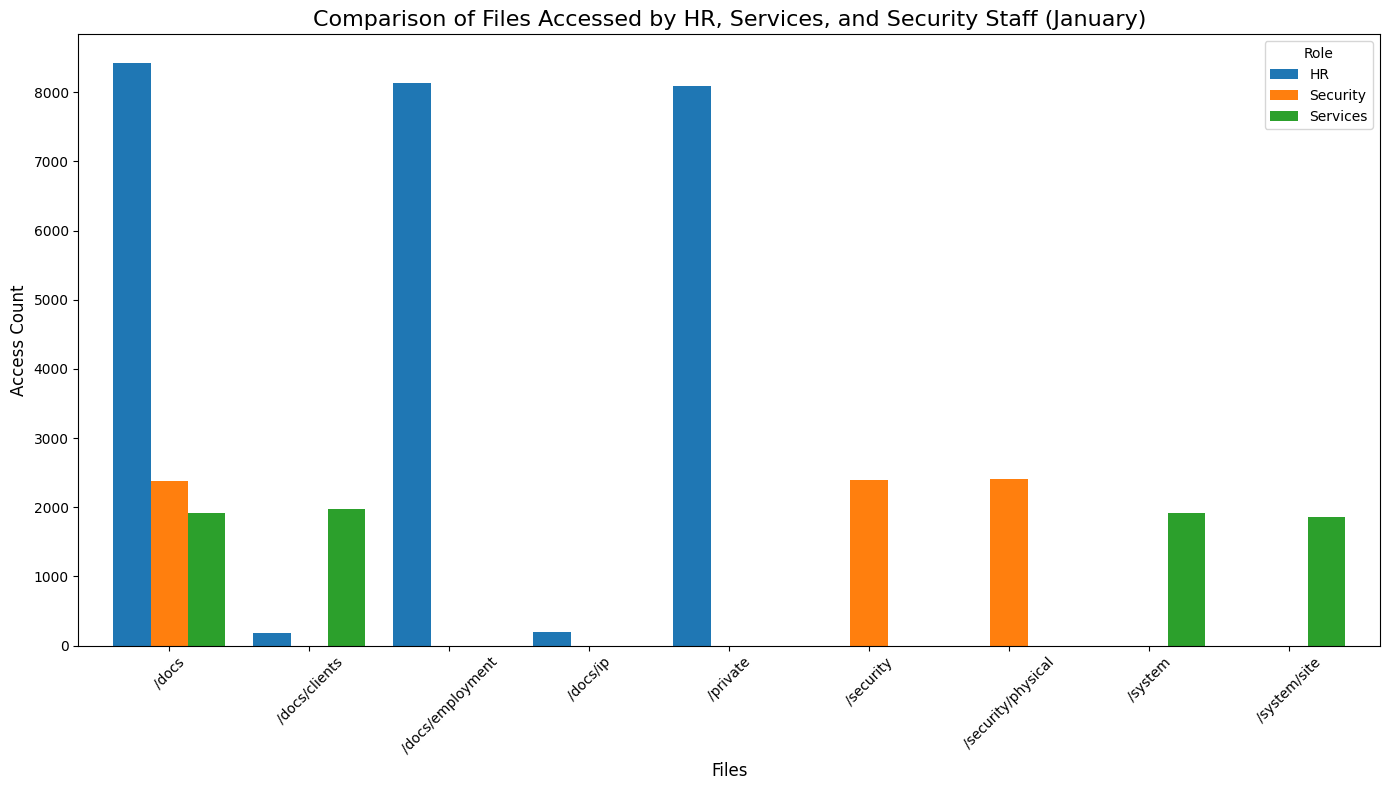

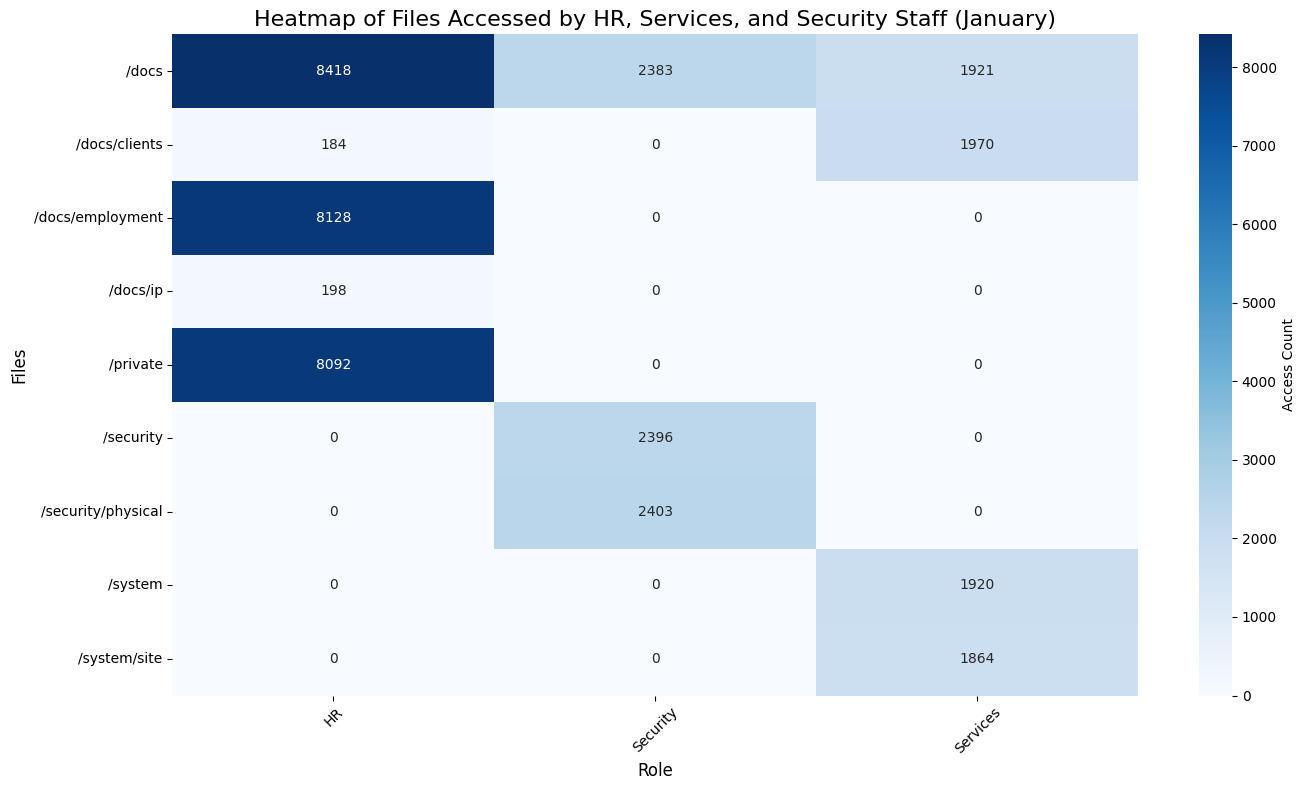

In [15]:
########################### 

#DATA PreProcessing 

########################### 


import pandas as pd 

import matplotlib.pyplot as plt 

import seaborn as sns 

  

# Load datasets 

file_data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/file_data.csv') 

employee_data = pd.read_csv('/Users/yaminshweyihtay/SDAV/Security-Data-Analysis-and-Visualisation/Part3/TechNovaInnovations/employee_data.csv') 

  

# Convert 'datetime' column to datetime format 

file_data['datetime'] = pd.to_datetime(file_data['datetime'], errors='coerce') 

  

# Filter for January 

january_files = file_data[file_data['datetime'].dt.month == 1] 

  

# Filter employees for the three roles 

roles_of_interest = ['HR', 'Services', 'Security'] 

employees_in_roles = employee_data[employee_data['role'].isin(roles_of_interest)] 

  

# Merge file_data with employee roles 

merged_data = pd.merge(january_files, employees_in_roles, how='inner', left_on='user', right_on='user') 

  

# Group by role and filename 

role_file_access = merged_data.groupby(['role', 'filename']).size().reset_index(name='access_count') 




########################### 

#Visualisation - Grouped Bar Chart  

########################### 

 

# Pivot data for bar chart 

pivot_data = role_file_access.pivot(index='filename', columns='role', values='access_count').fillna(0) 

  

# Plot grouped bar chart 

pivot_data.plot(kind='bar', figsize=(14, 8), width=0.8) 

  

# Enhance plot 

plt.title('Comparison of Files Accessed by HR, Services, and Security Staff (January)', fontsize=16) 

plt.xlabel('Files', fontsize=12) 

plt.ylabel('Access Count', fontsize=12) 

plt.xticks(rotation=45) 

plt.legend(title='Role', fontsize=10) 

plt.tight_layout() 

  

# Show plot 

plt.show() 



########################### 

#Visualisation - HeatMap

########################### 


# Plot heatmap 

plt.figure(figsize=(14, 8)) 

sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='Blues', cbar_kws={'label': 'Access Count'}) 

  

# Enhance plot 

plt.title('Heatmap of Files Accessed by HR, Services, and Security Staff (January)', fontsize=16) 

plt.xlabel('Role', fontsize=12) 

plt.ylabel('Files', fontsize=12) 

plt.xticks(rotation=45) 

plt.tight_layout() 

  

# Show plot 

plt.show() 


### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

In [16]:
######### ADD YOUR CODE HERE ##########

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)